In [1]:
import os
os.environ['XLA_FLAGS'] = '--xla_cpu_enable_fast_math=false'                                     


import jax.numpy as jnp
import numpy as onp
from jax.scipy.stats import norm
from scipy.stats import norm as spnorm
from jax import jit
from jax import vmap
from jax import grad
from jax.config import config; config.update("jax_enable_x64", True)



from ml_tools.jax_kernels import ard_rbf_kernel_efficient

In [2]:
# Let's make a really simple example.
onp.random.seed(2)
x = onp.random.uniform(-2, 2, size=20).reshape(-1, 1)

In [3]:
lscale = onp.reshape(onp.random.uniform(1, 5), (1,))
alpha = 1.

k_true = ard_rbf_kernel_efficient(x, x, alpha, lscale, jitter=0)

/anaconda2/envs/jax/lib/python3.7/site-packages/jax/lib/xla_bridge.py:114: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [4]:
draw = onp.random.multivariate_normal(onp.zeros(x.shape[0]), k_true)
noise = onp.random.randn(x.shape[0]) * 0.04
y = draw + noise

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

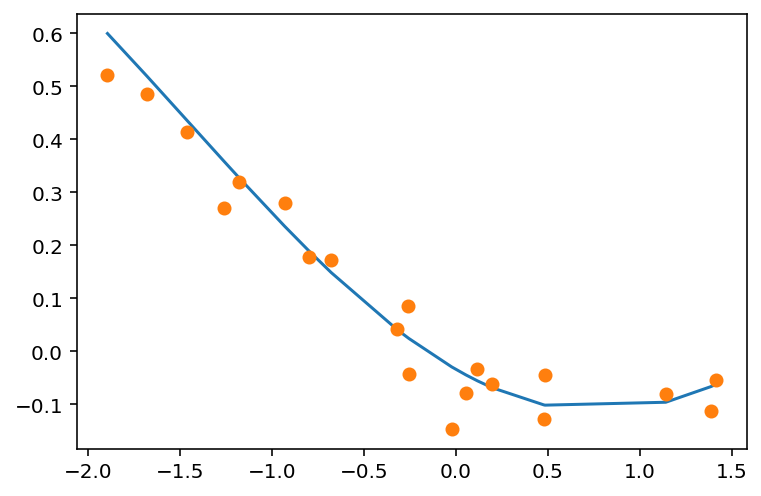

In [6]:
order = onp.argsort(x[:, 0])

plt.plot(x[order], draw[order])
plt.plot(x[order], y[order], marker='o', linestyle='none')

In [7]:
# Great. I have my input data x, and my outcomes y.

In [8]:
from svgp import get_starting_m_and_l

In [9]:
n_inducing = 20
m, L = get_starting_m_and_l(n_inducing)

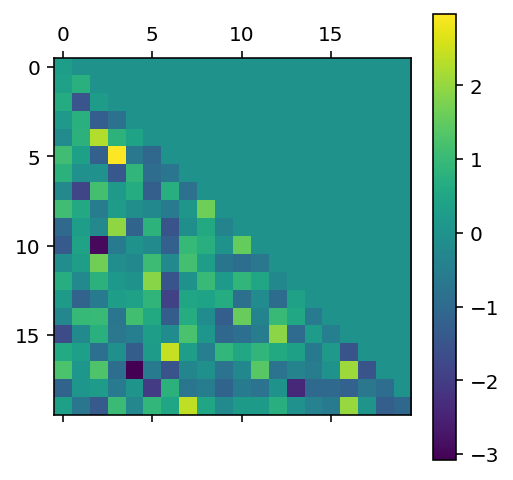

In [10]:
plt.matshow(L)
plt.colorbar()

In [11]:
Z = x

In [12]:
from svgp import compute_objective, extract_params
from likelihoods import gaussian_lik

In [13]:
from functools import partial
kern_fn = partial(ard_rbf_kernel_efficient, alpha=1., rho=jnp.array([2.]))

In [14]:
from jax import grad, jit

In [15]:
def rbf_gauss_objective(theta):
    
    m, L, kern_params = extract_params(
        theta, n_inducing, square_kern_params=True)
    
    obs_var = kern_params[0]
    
    kern_fn = partial(
        ard_rbf_kernel_efficient, alpha=kern_params[1],
        rho=kern_params[2:])
    
    cur_objective = -compute_objective(
        x, y, m, L, Z, partial(gaussian_lik, f_sd=jnp.sqrt(obs_var)), kern_fn)

    print(cur_objective)
    
    return cur_objective

def to_optimize(theta):
    
    return rbf_gauss_objective(theta), grad(rbf_gauss_objective)(theta)

In [16]:
start_vals = jnp.concatenate([
    onp.random.randn(n_inducing),
    L[onp.tril_indices_from(L)],
    jnp.reshape(0.1, (-1,)),
    jnp.reshape(alpha, (-1,)),
    jnp.reshape(lscale, (-1,))
])

In [17]:
from scipy.optimize import minimize

In [18]:
result = minimize(to_optimize, start_vals, jac=True, tol=1e-1)

8902422.223570207
Traced<ConcreteArray(8902422.223570207)>with<JVPTrace(level=1/0)>
8902422.223570207
Traced<ConcreteArray(8902422.223570207)>with<JVPTrace(level=1/0)>
7612723.009135986
Traced<ConcreteArray(7612723.009135986)>with<JVPTrace(level=1/0)>
3507821.9098864733
Traced<ConcreteArray(3507821.9098864733)>with<JVPTrace(level=1/0)>
601559.1393282779
Traced<ConcreteArray(601559.1393282779)>with<JVPTrace(level=1/0)>
14689709.076208886
Traced<ConcreteArray(14689709.076208886)>with<JVPTrace(level=1/0)>
166942.23252573036
Traced<ConcreteArray(166942.23252573036)>with<JVPTrace(level=1/0)>
1330876.2230218085
Traced<ConcreteArray(1330876.2230218085)>with<JVPTrace(level=1/0)>
79775.33015172336
Traced<ConcreteArray(79775.33015172336)>with<JVPTrace(level=1/0)>
85227.08549349889
Traced<ConcreteArray(85227.08549349889)>with<JVPTrace(level=1/0)>
37275.033827117535
Traced<ConcreteArray(37275.033827117535)>with<JVPTrace(level=1/0)>
33491.14517901452
Traced<ConcreteArray(33491.14517901452)>with<JVP

513.0376052910847
Traced<ConcreteArray(513.0376052910847)>with<JVPTrace(level=1/0)>
374.38077446386626
Traced<ConcreteArray(374.38077446386626)>with<JVPTrace(level=1/0)>
374.18197834396017
Traced<ConcreteArray(374.18197834396017)>with<JVPTrace(level=1/0)>
374.37745415042167
Traced<ConcreteArray(374.37745415042167)>with<JVPTrace(level=1/0)>
374.1144890336572
Traced<ConcreteArray(374.1144890336572)>with<JVPTrace(level=1/0)>
374.03810619421455
Traced<ConcreteArray(374.03810619421455)>with<JVPTrace(level=1/0)>
373.89138565803717
Traced<ConcreteArray(373.89138565803717)>with<JVPTrace(level=1/0)>
373.4561046413245
Traced<ConcreteArray(373.4561046413245)>with<JVPTrace(level=1/0)>
373.0486752738274
Traced<ConcreteArray(373.0486752738274)>with<JVPTrace(level=1/0)>
372.28092986561
Traced<ConcreteArray(372.28092986561)>with<JVPTrace(level=1/0)>
370.9809540103448
Traced<ConcreteArray(370.9809540103448)>with<JVPTrace(level=1/0)>
368.3956052085591
Traced<ConcreteArray(368.3956052085591)>with<JVPTrac

62.79039538039817
Traced<ConcreteArray(62.79039538039817)>with<JVPTrace(level=1/0)>
62.78970058966848
Traced<ConcreteArray(62.78970058966848)>with<JVPTrace(level=1/0)>
62.78692201001612
Traced<ConcreteArray(62.78692201001612)>with<JVPTrace(level=1/0)>
62.77581721089381
Traced<ConcreteArray(62.77581721089381)>with<JVPTrace(level=1/0)>
62.73155028428616
Traced<ConcreteArray(62.73155028428616)>with<JVPTrace(level=1/0)>
62.55692019592536
Traced<ConcreteArray(62.55692019592536)>with<JVPTrace(level=1/0)>
61.89749503783275
Traced<ConcreteArray(61.89749503783275)>with<JVPTrace(level=1/0)>
3499.3856566050767
Traced<ConcreteArray(3499.3856566050767)>with<JVPTrace(level=1/0)>
61.89725914877668
Traced<ConcreteArray(61.89725914877668)>with<JVPTrace(level=1/0)>
61.89678267561402
Traced<ConcreteArray(61.89678267561402)>with<JVPTrace(level=1/0)>
61.89487709146216
Traced<ConcreteArray(61.89487709146216)>with<JVPTrace(level=1/0)>
61.887260143036706
Traced<ConcreteArray(61.887260143036706)>with<JVPTrace(

56.32441596392951
Traced<ConcreteArray(56.32441596392951)>with<JVPTrace(level=1/0)>
56.31327430425725
Traced<ConcreteArray(56.31327430425725)>with<JVPTrace(level=1/0)>
56.27748176229945
Traced<ConcreteArray(56.27748176229945)>with<JVPTrace(level=1/0)>
1157.7503212006798
Traced<ConcreteArray(1157.7503212006798)>with<JVPTrace(level=1/0)>
56.27747937281744
Traced<ConcreteArray(56.27747937281744)>with<JVPTrace(level=1/0)>
56.27747454649049
Traced<ConcreteArray(56.27747454649049)>with<JVPTrace(level=1/0)>
56.27745524023038
Traced<ConcreteArray(56.27745524023038)>with<JVPTrace(level=1/0)>
56.27737803601132
Traced<ConcreteArray(56.27737803601132)>with<JVPTrace(level=1/0)>
56.277069530622704
Traced<ConcreteArray(56.277069530622704)>with<JVPTrace(level=1/0)>
56.27584040557637
Traced<ConcreteArray(56.27584040557637)>with<JVPTrace(level=1/0)>
56.27100227276981
Traced<ConcreteArray(56.27100227276981)>with<JVPTrace(level=1/0)>
56.252902005846344
Traced<ConcreteArray(56.252902005846344)>with<JVPTrac

KeyboardInterrupt: 